<a href="https://colab.research.google.com/github/sam-pyda/DataAnalytics/blob/main/Exploration_data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install lasio 
!pip install mplstereonet

In [11]:
!wget https://raw.githubusercontent.com/yohanesnuwara/formation-evaluation/main/fracture.py

--2021-03-01 22:01:46--  https://raw.githubusercontent.com/yohanesnuwara/formation-evaluation/main/fracture.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1840 (1.8K) [text/plain]
Saving to: ‘fracture.py’

fracture.py         100%[===================>]   1.80K  --.-KB/s    in 0s      

2021-03-01 22:01:46 (33.7 MB/s) - ‘fracture.py’ saved [1840/1840]



# New section

In [30]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import lasio
import mplstereonet
import plotly.express as px

In [13]:
import fracture

In [14]:
well_path = "http://bit.ly/wireline-data"
trajectory_path = "http://bit.ly/trajectory-data"
fracture_path = "http://bit.ly/fractures-data"

In [15]:
#visualizing well log data
well= lasio.read(well_path)

In [16]:
#mnemonics 
well.curves

[CurveItem(mnemonic="DEPT", unit="m", value="", descr="DEPTH", original_mnemonic="DEPT", data.shape=(21386,)),
 CurveItem(mnemonic="LITHOLOGY_GEOLINK", unit="_", value="", descr="Lithology_geolink", original_mnemonic="LITHOLOGY_GEOLINK", data.shape=(21386,)),
 CurveItem(mnemonic="CALI", unit="in", value="", descr="CALI", original_mnemonic="CALI", data.shape=(21386,)),
 CurveItem(mnemonic="DRHO", unit="g/cm3", value="", descr="DRHO", original_mnemonic="DRHO", data.shape=(21386,)),
 CurveItem(mnemonic="NPHI", unit="m3/m3", value="", descr="NPHI", original_mnemonic="NPHI", data.shape=(21386,)),
 CurveItem(mnemonic="RHOB", unit="g/cm3", value="", descr="RHOB", original_mnemonic="RHOB", data.shape=(21386,)),
 CurveItem(mnemonic="GR", unit="gAPI", value="", descr="GR", original_mnemonic="GR", data.shape=(21386,)),
 CurveItem(mnemonic="DTC", unit="us/ft", value="", descr="DTC", original_mnemonic="DTC", data.shape=(21386,)),
 CurveItem(mnemonic="DTE", unit="us/ft", value="", descr="DTE", origi

In [17]:
well.df().reset_index()

,DEPT,LITHOLOGY_GEOLINK,CALI,DRHO,NPHI,RHOB,GR,DTC,DTE,RDEP,SP,RSHA,RXO,RMED
0,493.493134,NaN,19.406000,-0.708,NaN,1.789,64.497482,167.582153,50815100.0,1.574993,0.694700,1.546029,NaN,1.546029
1,493.645538,NaN,19.406000,-0.722,NaN,1.754,62.406261,167.425064,50761636.0,1.569011,0.445339,1.570030,NaN,1.570030
2,493.797943,NaN,19.406000,-0.620,NaN,1.778,62.629055,167.808395,50886056.0,1.578010,0.727901,1.594994,NaN,1.594994
3,493.950348,NaN,19.452999,-0.648,NaN,1.642,65.998596,169.244873,51314492.0,1.586024,1.474898,1.589930,NaN,1.589930
4,494.102722,NaN,19.452999,-0.685,NaN,1.563,64.997223,170.635086,51763464.0,1.603011,-0.023000,1.540016,NaN,1.540016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21381,3751.957031,NaN,7.555000,0.085,0.13574,2.586,NaN,NaN,NaN,3.363003,70.302795,3.159997,NaN,3.159997
21382,3752.109375,NaN,7.555000,0.085,0.13574,2.586,NaN,NaN,NaN,3.364997,70.799194,3.158000,NaN,3.158000
21383,3752.261963,NaN,7.555000,0.085,0.13574,2.586,NaN,NaN,NaN,3.363006,71.544258,3.158000,NaN,3.158000
21384,3752.414307,NaN,7.555000,0.085,0.13574,2.586,NaN,NaN,NaN,3.364537,70.463211,3.158000,NaN,3.158000


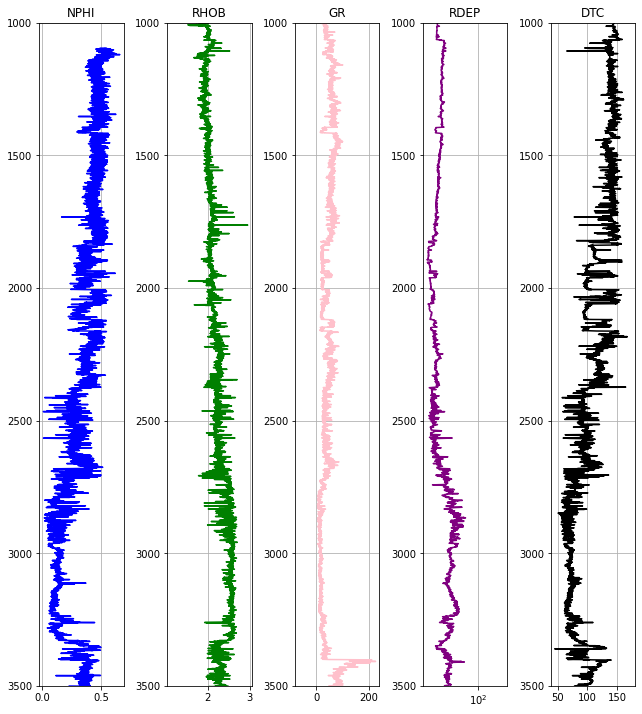

In [25]:
log=['NPHI','RHOB','GR','RDEP','DTC']
color=['blue','green','pink','purple','black']
plt.figure(figsize=(9,10))

#for i in range(len(log)):
   # print(well[log[i]])
for i in range(5):
  plt.subplot(1,5,i+1)
  if log[i] == 'RDEP':
    plt.semilogx(well[log[i]],well['DEPT'],color=color[i])
  else:
    plt.plot(well[log[i]], well['DEPT'],color=color[i])
  plt.title(log[i])
  plt.grid()
  plt.tight_layout(1,3)
  plt.ylim(3500,1000)

In [33]:
####wellbore trajectory
traj_df=pd.read_csv(trajectory_path)
traj_df.head()



,azi,md,tvd,incl,dispNs,dispEw,TVD_calc,surfNs,surfEw
0,0.00,0.0,0.0000,0.00,-3.1700,3.5300,0.000000,6.478560e+06,435053.550000
1,0.00,145.9,145.9000,0.00,-3.1700,3.5300,145.900000,6.478560e+06,435053.550000
2,253.69,153.4,153.4000,0.15,-3.1728,3.5206,153.399991,6.478560e+06,435053.540578
3,146.02,234.2,234.1996,0.28,-3.3662,3.5294,234.199630,6.478560e+06,435053.549412
4,136.21,274.6,274.5978,0.78,-3.6465,3.7749,274.597780,6.478560e+06,435053.794881


In [42]:
x= traj_df['surfEw'].values
y=traj_df['surfNs'].values
z=traj_df['tvd'].values

fig=px.scatter_3d(traj_df, x,y,z,color='incl')
fig.update_scenes(zaxis_autorange='reversed')
fig.show()

# Natural Fracture Analysis

In [43]:
frac= pd.read_csv(fracture_path)
frac.head()

,depth,strike,dip,dip_direction,aperture
0,5200.824,228.25,76.41,318.25,4.31
1,5200.965,207.80,86.11,297.80,5.87
2,5205.068,233.97,84.07,323.97,7.22
3,5208.820,206.68,82.67,296.68,5.52
4,5221.970,214.65,77.20,304.65,5.44


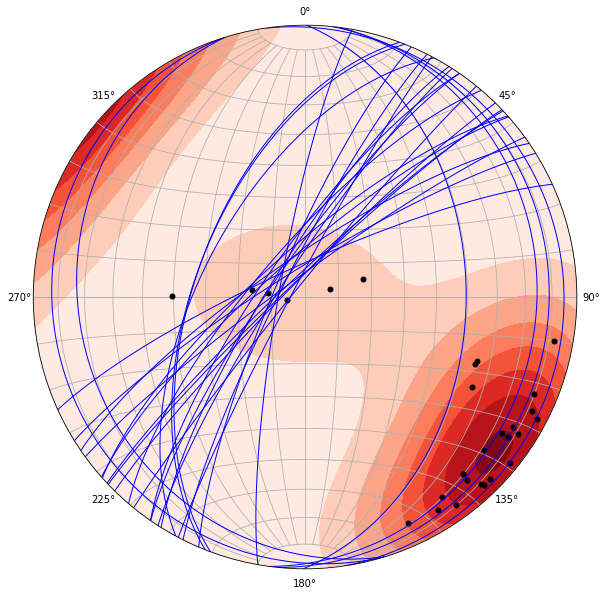

In [44]:
strike =frac['strike'].values
dip= frac['dip'].values
fracture.stereonet(strike,dip)


dip is 80-90 degree,
strike is 0-45 degree
```
# This is formatted as code
```



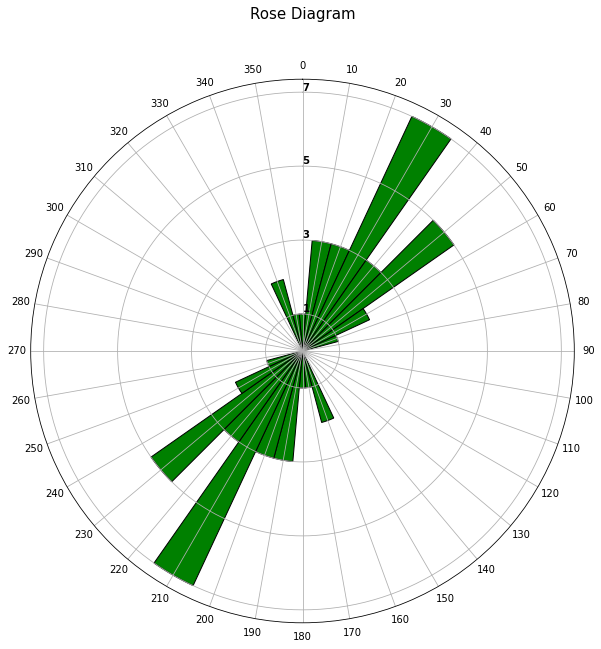

In [45]:
fracture.rose(strike)